
| Nome        | nUSP           | 
| ------------- |:-------------:|
| Pedro Raul Taborga da Costa | 4537076 |
| Flavio de Figueiroa Teixeira Silva | 1127072|


## Tarefas

### 0. Baixar o dataset pelo site ou pelo comando

```kaggle datasets download mlg-ulb/creditcardfraud``` 

# 1. Fazer a leitura do conjunto de dados  escolhido usando  bibliotecas prontas ou funções das linguagens de programação Python ou R, por exemplo a biblioteca Pandas do Python.

In [1]:
import pandas as pd
dtFolder = "../../datasets/"
df = pd.read_csv(dtFolder+"creditcardfraud.zip")
cols = df.columns.tolist()
reord = [cols.pop(0),cols.pop(-2),cols.pop(-1)]
cols = reord + cols
df = df[cols]

## Pré-Rebalanceamento

<AxesSubplot:title={'center':'Tipo de Transações'}>

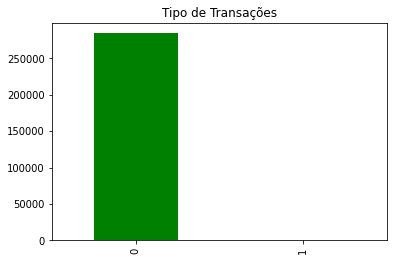

In [2]:
dfRen = df
dfRen["Class"].value_counts().plot(kind="bar", color={"green":"0","red":"1"}, title="Tipo de Transações") #lol

## Após rebalanceamento
Dentre as técnicas de rebalanceamento:

1. under sampling -> random
1. over sampling -> random, SMOTE (synthetic minority oversampling techinique)
1. hibrida -> SMOTE -> TOMEK 

Escolhemos utilizar random oversampling, visto que a perda de dados por undesampling se mostrou grande mais

<AxesSubplot:title={'center':'Tipo de Transações'}>

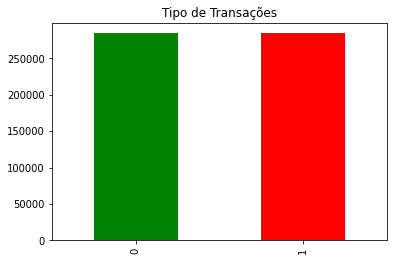

In [3]:
# Armazenando a quantidade de entradas de cada tipo de transação
count_legal, count_fraude = dfRen["Class"].value_counts()

# Separando o dataset em 2 dataframes, cada um contendo só um tipo de transação
df_legal = dfRen[dfRen["Class"] == 0].reset_index()
df_fraude = dfRen[dfRen["Class"] == 1].reset_index()

# Escolhe aleatoriamente o mesmo número que temos em fraudes dentre o total de transações legais
df_fraude_over = df_fraude.sample(count_legal, replace=True)

# Cria e exibe um dataframe a partir da junção dos 2, agora balanceados
df_balanced = pd.concat([df_legal,df_fraude_over], axis=0, ignore_index=True).drop(columns=["index"])
df_balanced["Class"].value_counts().plot(kind="bar",color={"green":"Legal","red":"Fraude"},title="Tipo de Transações")



# 4. Aplicar alguma técnica de normalização nos dados.


In [4]:
# Normalização por MinMaxScaler, onde os valores ficarão entre 0 e 1, que será útil para algoritmos de aprendizado
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df_balanced)
df_norm = pd.DataFrame(df_mm, columns=cols)
df_norm


,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.000000,0.005824,0.0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,...,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697
1,0.000000,0.000105,0.0,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,...,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423
2,0.000006,0.014739,0.0,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,...,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911
3,0.000006,0.004807,0.0,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,...,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371
4,0.000012,0.002724,0.0,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,...,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.930547,0.000039,1.0,0.994520,0.774704,0.776231,0.274750,0.775997,0.245764,0.272257,...,0.546036,0.578017,0.564119,0.542868,0.661794,0.444226,0.629564,0.390069,0.416027,0.312617
568626,0.367945,0.011295,1.0,0.947435,0.766355,0.859342,0.314043,0.763962,0.273172,0.273287,...,0.654247,0.589436,0.566966,0.545493,0.670682,0.277279,0.573939,0.420000,0.415367,0.311852
568627,0.455606,0.002335,1.0,0.885030,0.787163,0.796888,0.230863,0.757736,0.241785,0.252423,...,0.562570,0.572613,0.570354,0.506865,0.648879,0.418491,0.576752,0.268064,0.399550,0.313153
568628,0.349281,0.017703,1.0,0.890760,0.773395,0.804829,0.443399,0.745357,0.275495,0.253722,...,0.610674,0.573275,0.570813,0.575216,0.680958,0.341270,0.578204,0.463906,0.434268,0.299455


<AxesSubplot:>

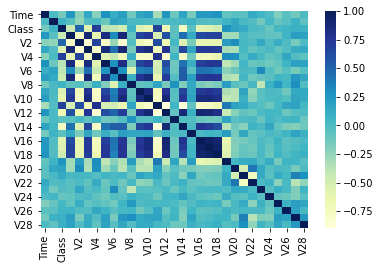

In [5]:
import seaborn as sns
corr_matrix = df_norm.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [6]:
selected = corr_matrix.applymap(lambda x : x > 0.8 and x != 1)
listaVars = []
for c in selected.columns:
    for index,values in selected[c].items():
        if values == True:
            numA = c.split("V")[1]
            numB = index.split("V")[1]
            if numB > numA:
                listaVars.append([numA,numB])
listaVars #Corresponde a dupla de atributos com uma correlação maior que 0.8


[['1', '3'],
 ['1', '5'],
 ['1', '7'],
 ['3', '5'],
 ['3', '7'],
 ['5', '7'],
 ['10', '3'],
 ['10', '7'],
 ['10', '9'],
 ['10', '12'],
 ['10', '16'],
 ['10', '17'],
 ['10', '18'],
 ['12', '14'],
 ['12', '16'],
 ['12', '17'],
 ['12', '18'],
 ['16', '17'],
 ['16', '18'],
 ['17', '18']]

In [7]:
from math import sqrt


def euclidiana(treino, rowTeste):
    dist = sqrt((treino[0]-rowTeste[0])**2 + (treino[1]-rowTeste[1])**2)
    return [dist,treino[2]]

def manhattan(treino, rowTeste):
    dist = abs((treino[0]-rowTeste[0])) + abs((treino[1]-rowTeste[1]))
    return [dist,treino[2]]
    

In [8]:
def knn(treino: pd.DataFrame,teste: pd.DataFrame,k: list, distancia: str):
    resultado = pd.DataFrame(columns=["Index","K","Esperado","Calculado"])
    for i, rowTeste in teste.iterrows():
        # Representa a distância entre UMA linha de teste para todos os pontos do treino
        if distancia == "euclidiana":
            dist = treino.apply(euclidiana, axis=1, rowTeste=rowTeste, result_type="expand").rename(columns={0:"Distancia",1:"Class"})
        elif distancia == "manhattan":
            dist = treino.apply(manhattan, axis=1, rowTeste=rowTeste, result_type="expand").rename(columns={0:"Distancia",1:"Class"})
        # Organiza pela menor distancia
        dist.sort_values(by="Distancia",inplace=True)
        # Utilizamos os K valores para classificar a qual grupo o teste pertence
        for numK in k:
            # Pega o número de vizinhos desejado
            topValores = dist.head(numK)
            # Retorna a classificacao baseada no máximo da classificacao dos vizinhos
            classificacao = topValores["Class"].value_counts().idxmax() 
            # Adiciona ao dataframe de respostas
            add = {"Index":i,"K":numK, "Esperado":rowTeste["Class"],"Calculado": classificacao}
            resultado = resultado.append(add,ignore_index=True)
    return resultado, teste.shape[0], k

def porcentagemAcertos(resultados: pd.DataFrame, sizeTeste:int, kList: list, colA: str, colB: str):
    print(f"Resultados utilizando os atributos {colA} e {colB}:")
    for k in kList:
        acertos = resultados.loc[resultados["K"] == float(k)].apply(lambda x: x[2] == x[3], axis=1).sum()
        print(f"{acertos} de {sizeTeste} ({(acertos/sizeTeste)*100:.2f}%) com k = {k}")

In [10]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

for atrA,atrB in listaVars:
    colA = "V"+atrA
    colB = "V"+atrB
    df_selectedCol = pd.concat([df_norm[colA],df_norm[colB],df_norm["Class"]],axis=1)
    treino, teste = train_test_split(df_selectedCol,test_size=0.2, random_state=42) # Treino: 454904  Teste: 113726

    sns.scatterplot(data=treino.iloc[0:500], x=colA, y=colB, hue="Class")
    plt.savefig(f"scatters/{colA}{colB}_treino.png")
    plt.clf()
    sns.scatterplot(data=teste.iloc[0:60], x=colA, y=colB)
    plt.savefig(f"scatters/{colA}{colB}_teste.png")
    plt.clf()

    explode, sizeTeste, kList = knn(treino=treino.iloc[0:500], teste=teste.iloc[0:60],k=[3,7],distancia="euclidiana")
    porcentagemAcertos(explode,sizeTeste, kList, colA, colB)

Resultados utilizando os atributos V1 e V3:
52 de 60 (86.67%) com k = 3
52 de 60 (86.67%) com k = 7
Resultados utilizando os atributos V1 e V5:
47 de 60 (78.33%) com k = 3
45 de 60 (75.00%) com k = 7
Resultados utilizando os atributos V1 e V7:
49 de 60 (81.67%) com k = 3
49 de 60 (81.67%) com k = 7
Resultados utilizando os atributos V3 e V5:
52 de 60 (86.67%) com k = 3
52 de 60 (86.67%) com k = 7
Resultados utilizando os atributos V3 e V7:
50 de 60 (83.33%) com k = 3
51 de 60 (85.00%) com k = 7
Resultados utilizando os atributos V5 e V7:
48 de 60 (80.00%) com k = 3
49 de 60 (81.67%) com k = 7
Resultados utilizando os atributos V10 e V3:
54 de 60 (90.00%) com k = 3
53 de 60 (88.33%) com k = 7
Resultados utilizando os atributos V10 e V7:
53 de 60 (88.33%) com k = 3
53 de 60 (88.33%) com k = 7
Resultados utilizando os atributos V10 e V9:
52 de 60 (86.67%) com k = 3
53 de 60 (88.33%) com k = 7
Resultados utilizando os atributos V10 e V12:
53 de 60 (88.33%) com k = 3
54 de 60 (90.00%) com k

<Figure size 432x288 with 0 Axes>